In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**1. loading dataset**

In [49]:
# menghubungkan colab ke gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
path = '/content/drive/MyDrive/ML_praktikum/praktikumreview7'

In [51]:
import pandas as pd

# membaca file csv menggunakan pandas
df = pd.read_csv(path + '/data/apples_and_oranges.csv')

#cetak header data (5 baris data) dari file
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [53]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [61]:
df['Class'].unique()

array([1, 0])

In [62]:
df['Class'].value_counts()

,count
Class,
1,20
0,20


In [63]:
X = df[['Weight', 'Size']]

# Kolom terget (label)
y = df['Class']

In [64]:
y.head()

,Class
0,1
1,1
2,1
3,0
4,1


In [54]:
from sklearn.preprocessing import LabelEncoder

# Ubah kolom label jadi numerik
encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])  # pastikan nama kolom label benar

# Pisahkan fitur dan target
X = df[['Weight', 'Size']]
y = df['Class']

In [55]:
# Normalisasi & Split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
# Bangun model SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [68]:
# Evaluasi Akurasi dan Report Klasifikasi

y_pred = model.predict(X_test)
# Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
# Laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8




Confusion Matrix:
 [[4 0]
 [0 4]]


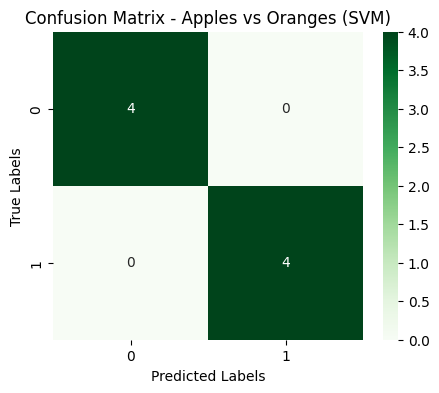

In [69]:
# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Apples vs Oranges (SVM)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

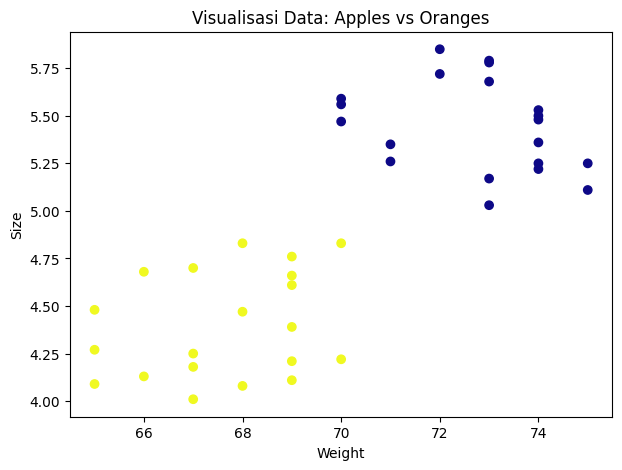

In [59]:
# Visualisasi
plt.figure(figsize=(7,5))
plt.scatter(df['Weight'], df['Size'], c=df['Class'], cmap='plasma')
plt.title("Visualisasi Data: Apples vs Oranges")
plt.xlabel("Weight")
plt.ylabel("Size")
plt.show()

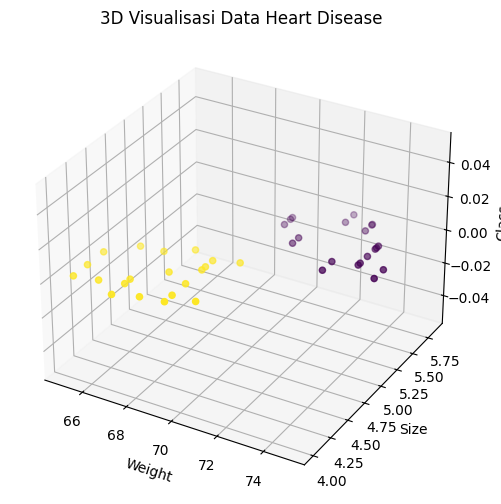

In [60]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Weight'], df['Size'], c=df['Class'],
           cmap='viridis')

ax.set_xlabel('Weight')
ax.set_ylabel('Size')
ax.set_zlabel('Class')
plt.title("3D Visualisasi Data Heart Disease")
plt.show()